# Importing Libraries and Loading the Dataset

In [1]:
import numpy as np
import pandas as pd
import datetime
from datetime import date
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
from sklearn.preprocessing import StandardScaler, normalize
from sklearn.mixture import GaussianMixture
from mlxtend.frequent_patterns import apriori, association_rules
import warnings

warnings.filterwarnings('ignore')

data = pd.read_csv(r'/kaggle/input/customer-personality-analysis/marketing_campaign.csv', sep='\t')
data.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# EDA (Exploratory Data Analysis)

In [2]:
# Summary statistics
data.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


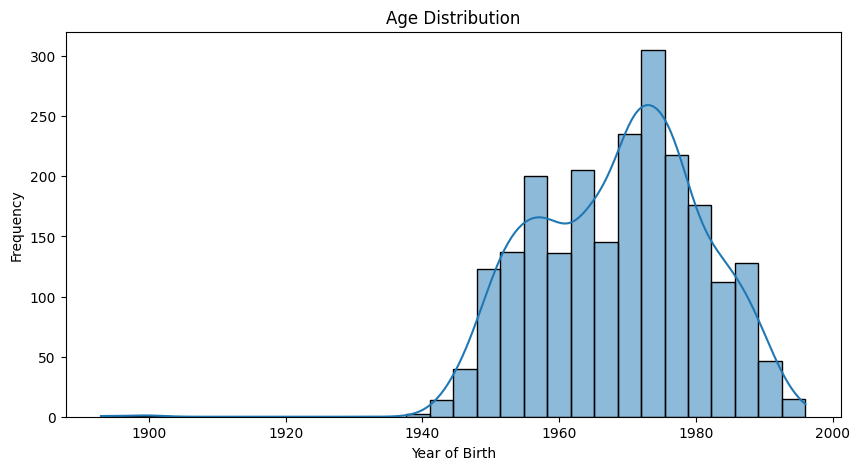

In [3]:
# Age distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Year_Birth'], bins=30, kde=True)
plt.title('Age Distribution')
plt.xlabel('Year of Birth')
plt.ylabel('Frequency')
plt.show()

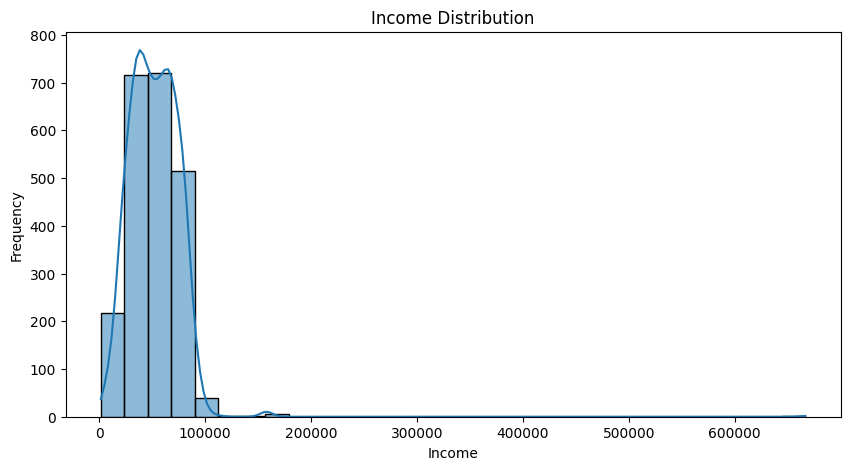

In [4]:
# Income distribution
plt.figure(figsize=(10, 5))
sns.histplot(data['Income'].dropna(), bins=30, kde=True)
plt.title('Income Distribution')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.show()

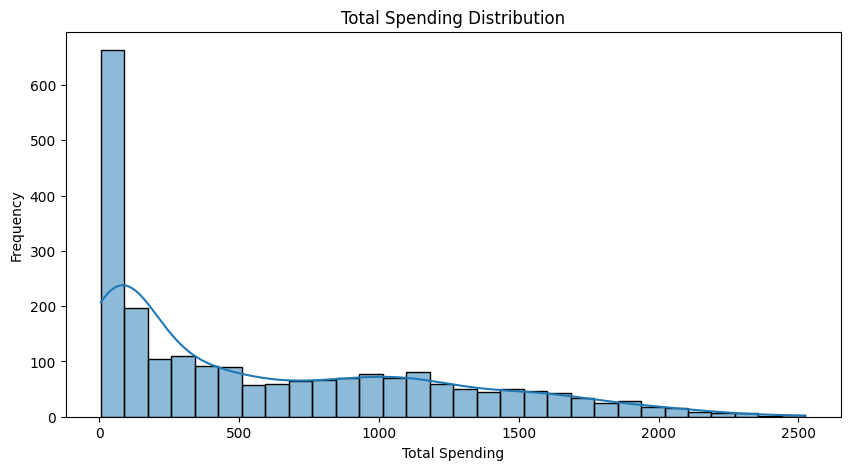

In [5]:
# Spending distribution
spending_columns = ['MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds']
data['Spending'] = data[spending_columns].sum(axis=1)

plt.figure(figsize=(10, 5))
sns.histplot(data['Spending'], bins=30, kde=True)
plt.title('Total Spending Distribution')
plt.xlabel('Total Spending')
plt.ylabel('Frequency')
plt.show()

# Data Preparation

In [6]:
# Spending variable creation
data['Age'] = 2014 - data['Year_Birth']
data['Spending'] = data['MntWines'] + data['MntFruits'] + data['MntMeatProducts'] + data['MntFishProducts'] + data['MntSweetProducts'] + data['MntGoldProds']

In [7]:
# Convert 'Dt_Customer' to datetime
data['Dt_Customer'] = pd.to_datetime(data['Dt_Customer'], dayfirst=True, format='%d-%m-%Y')

# Define the last date for Seniority calculation as a datetime object
last_date = pd.to_datetime(date(2014, 10, 4))

# Calculate Seniority in days
data['Seniority'] = (last_date - data['Dt_Customer']).dt.days.astype(int)

# Select only numerical columns for scaling
numerical_cols = ['Income', 'Seniority', 'Spending']
dataset_temp = data[numerical_cols]

In [8]:
# Renaming columns for clarity
data = data.rename(columns={
    'NumWebPurchases': 'Web',
    'NumCatalogPurchases': 'Catalog',
    'NumStorePurchases': 'Store'
})

In [9]:
# Replacing values for clarity
data['Marital_Status'] = data['Marital_Status'].replace({
    'Divorced': 'Alone',
    'Single': 'Alone',
    'Married': 'In couple',
    'Together': 'In couple',
    'Absurd': 'Alone',
    'Widow': 'Alone',
    'YOLO': 'Alone'
})
data['Education'] = data['Education'].replace({
    'Basic': 'Undergraduate',
    '2n Cycle': 'Undergraduate',
    'Graduation': 'Postgraduate',
    'Master': 'Postgraduate',
    'PhD': 'Postgraduate'
})

In [10]:
# Adding child information
data['Children'] = data['Kidhome'] + data['Teenhome']
data['Has_child'] = np.where(data.Children > 0, 'Has child', 'No child')
data['Children'].replace({3: '3 children', 2: '2 children', 1: '1 child', 0: 'No child'}, inplace=True)

In [11]:
# Renaming product columns for clarity
data = data.rename(columns={
    'MntWines': 'Wines',
    'MntFruits': 'Fruits',
    'MntMeatProducts': 'Meat',
    'MntFishProducts': 'Fish',
    'MntSweetProducts': 'Sweets',
    'MntGoldProds': 'Gold'
})

In [12]:
# Selecting relevant columns
data = data[['Age', 'Education', 'Marital_Status', 'Income', 'Spending', 'Seniority', 'Has_child', 'Children', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold']]
data.head()

,Age,Education,Marital_Status,Income,Spending,Seniority,Has_child,Children,Wines,Fruits,Meat,Fish,Sweets,Gold
0,57,Postgraduate,Alone,58138.0,1617,760,No child,No child,635,88,546,172,88,88
1,60,Postgraduate,Alone,46344.0,27,210,Has child,2 children,11,1,6,2,1,6
2,49,Postgraduate,In couple,71613.0,776,409,No child,No child,426,49,127,111,21,42
3,30,Postgraduate,In couple,26646.0,53,236,Has child,1 child,11,4,20,10,3,5
4,33,Postgraduate,In couple,58293.0,422,258,Has child,1 child,173,43,118,46,27,15


# Handling Missing Values and Outliers

In [13]:
# Remove missing values
data = data.dropna(subset=['Income'])
# Remove outliers
data = data[data['Income'] < 600000]

# Clustering

In [14]:
# Normalize the data
scaler = StandardScaler()
dataset_temp = data[['Income', 'Seniority', 'Spending']]
X_std = scaler.fit_transform(dataset_temp)
X = normalize(X_std, norm='l2')

# Apply Gaussian Mixture Model for clustering
gmm = GaussianMixture(n_components=4, covariance_type='spherical', max_iter=2000, random_state=5).fit(X)
labels = gmm.predict(X)
dataset_temp['Cluster'] = labels
dataset_temp = dataset_temp.replace({0: 'Stars', 1: 'Need attention', 2: 'High potential', 3: 'Leaky bucket'})
data = data.merge(dataset_temp.Cluster, left_index=True, right_index=True)

# Summarize clusters
summary = data[['Income', 'Spending', 'Seniority', 'Cluster']]
summary.set_index('Cluster', inplace=True)
summary = summary.groupby('Cluster').describe().transpose()
summary.head()

Cluster       High potential  Leaky bucket  Need attention         Stars
Income count      584.000000    641.000000      528.000000    462.000000
       mean     34756.965753  37705.014041    69541.708333  73437.746753
       std      12074.730012  12396.732962    12005.908830  13752.851295
       min       2447.000000   1730.000000    44802.000000  49090.000000
       25%      26489.250000  28839.000000    60880.250000  65298.250000

# Visualizing Clusters

In [15]:
PLOT = go.Figure()
for C in list(data.Cluster.unique()):
    PLOT.add_trace(go.Scatter3d(
        x=data[data.Cluster == C]['Income'],
        y=data[data.Cluster == C]['Seniority'],
        z=data[data.Cluster == C]['Spending'],
        mode='markers',
        marker_size=6,
        marker_line_width=1,
        name=str(C)
    ))
PLOT.update_traces(hovertemplate='Income: %{x} <br>Seniority: %{y} <br>Spending: %{z}')
PLOT.update_layout(
    width=800, height=800, autosize=True, showlegend=True,
    scene=dict(
        xaxis=dict(title='Income', titlefont_color='black'),
        yaxis=dict(title='Seniority', titlefont_color='black'),
        zaxis=dict(title='Spending', titlefont_color='black')
    ),
    font=dict(family='Gilroy', color='black', size=12)
)
PLOT.show()

# Data Preparation for Apriori Algorithm

In [16]:
# Age segment
cut_labels_Age = ['Young', 'Adult', 'Mature', 'Senior']
cut_bins = [0, 30, 45, 65, 120]
data['Age_group'] = pd.cut(data['Age'], bins=cut_bins, labels=cut_labels_Age)

# Income segment
cut_labels_Income = ['Low income', 'Low to medium income', 'Medium to high income', 'High income']
data['Income_group'] = pd.qcut(data['Income'], q=4, labels=cut_labels_Income)

# Seniority segment
cut_labels_Seniority = ['New customers', 'Discovering customers', 'Experienced customers', 'Old customers']
data['Seniority_group'] = pd.qcut(data['Seniority'], q=4, labels=cut_labels_Seniority)

# Drop original columns
data = data.drop(columns=['Age', 'Income', 'Seniority'])

# Defining Segments Based on Product Consumption

In [17]:
cut_labels = ['Low consumer', 'Frequent consumer', 'Biggest consumer']

# Apply qcut and categorize
data['Wines_segment'] = pd.qcut(data['Wines'][data['Wines'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')
data['Fruits_segment'] = pd.qcut(data['Fruits'][data['Fruits'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')
data['Meat_segment'] = pd.qcut(data['Meat'][data['Meat'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')
data['Fish_segment'] = pd.qcut(data['Fish'][data['Fish'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')
data['Sweets_segment'] = pd.qcut(data['Sweets'][data['Sweets'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')
data['Gold_segment'] = pd.qcut(data['Gold'][data['Gold'] > 0], q=[0, .25, .75, 1], labels=cut_labels).astype('object')

# Fill NaN values with 'Not consumer' where applicable
data['Wines_segment'].fillna('Not consumer', inplace=True)
data['Fruits_segment'].fillna('Not consumer', inplace=True)
data['Meat_segment'].fillna('Not consumer', inplace=True)
data['Fish_segment'].fillna('Not consumer', inplace=True)
data['Sweets_segment'].fillna('Not consumer', inplace=True)
data['Gold_segment'].fillna('Not consumer', inplace=True)

# Drop original product columns
data.drop(columns=['Wines', 'Fruits', 'Meat', 'Fish', 'Sweets', 'Gold'], inplace=True)

print(data)

         Education Marital_Status  Spending  Has_child    Children  \
0     Postgraduate          Alone      1617   No child    No child   
1     Postgraduate          Alone        27  Has child  2 children   
2     Postgraduate      In couple       776   No child    No child   
3     Postgraduate      In couple        53  Has child     1 child   
4     Postgraduate      In couple       422  Has child     1 child   
...            ...            ...       ...        ...         ...   
2235  Postgraduate      In couple      1341  Has child     1 child   
2236  Postgraduate      In couple       444  Has child  3 children   
2237  Postgraduate          Alone      1241   No child    No child   
2238  Postgraduate      In couple       843  Has child     1 child   
2239  Postgraduate      In couple       172  Has child  2 children   

             Cluster Age_group           Income_group        Seniority_group  \
0     Need attention    Mature  Medium to high income          Old customers   

# Apriori Algorithm

In [18]:
# Fill NaN values appropriately for categorical columns
for column in data.columns:
    if pd.api.types.is_categorical_dtype(data[column]):
        data[column] = data[column].cat.add_categories('Unknown')  # Adding 'Unknown' as a new category
        data[column].fillna('Unknown', inplace=True)
    elif data[column].dtype == 'object':
        data[column].fillna('Unknown', inplace=True)
    else:
        data[column].fillna(0, inplace=True)  # For numerical columns

# Convert to boolean if necessary
data = data.astype(bool)

# Apply Apriori algorithm
data = data.replace({True: 1, False: 0})
frequent_itemsets = apriori(data, min_support=0.1, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='lift', min_threshold=1)
print(rules.head())

        antecedents       consequents  antecedent support  consequent support  \
0       (Education)  (Marital_Status)                 1.0                 1.0   
1  (Marital_Status)       (Education)                 1.0                 1.0   
2        (Spending)       (Education)                 1.0                 1.0   
3       (Education)        (Spending)                 1.0                 1.0   
4       (Education)       (Has_child)                 1.0                 1.0   

   support  confidence  lift  leverage  conviction  zhangs_metric  
0      1.0         1.0   1.0       0.0         inf            0.0  
1      1.0         1.0   1.0       0.0         inf            0.0  
2      1.0         1.0   1.0       0.0         inf            0.0  
3      1.0         1.0   1.0       0.0         inf            0.0  
4      1.0         1.0   1.0       0.0         inf            0.0  
